In [21]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Generate synthetic data
N = 100
# Zeros form a Gaussian centered at (-1, -1)
# epsilon is .1
x_zeros = np.random.multivariate_normal(mean=np.array((5, 5)), cov=1.1*np.eye(2), size=(int(N/2),))
y_zeros = np.zeros((int(N/2),))
# Ones form a Gaussian centered at (1, 1)
# epsilon is .1
x_ones = np.random.multivariate_normal(
    mean=np.array((2, 2)), cov=1.1*np.eye(2), size=(int(N/2),))
y_ones = np.ones((int(N/2),))
x_np_cluster = np.vstack([x_zeros, x_ones])
y_np_cluster = np.concatenate([y_zeros, y_ones])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y_np_cluster = sess.run(tf.random_shuffle(y_np_cluster))


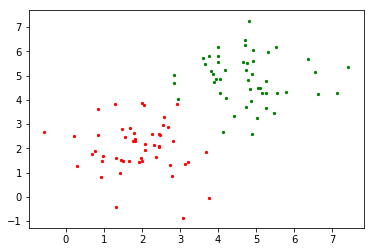

In [22]:
plt.scatter(np.reshape(x_ones, (2, int(N/2)))[0], np.reshape(x_ones, (2, int(N/2)))[1], s = 5, c='r')
plt.scatter(np.reshape(x_zeros, (2, int(N/2)))[0], np.reshape(x_zeros, (2, int(N/2)))[1], s = 5, c='g')

plt.show()

In [23]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

learning_rate = 0.001
epochs = 4000

W = tf.Variable(tf.random_normal((2, 1)), name = "W")
b = tf.Variable(tf.random_normal((1,)), name = "Bias")

y_logit = tf.matmul(X, W) + b
y_sigmoid = tf.sigmoid(y_logit)
y_model = tf.round(y_sigmoid)

cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=Y)

loss = tf.reduce_sum(cost**2)

In [24]:
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [27]:
W_val = [0., 0.]
Bias_val = [0.]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        _, final_loss = sess.run([train_op, loss], feed_dict = {X: x_np_cluster, Y: y_np_cluster})
        if(epoch % 1000 == 0):
            print("step %d, loss: %f" % (epoch, final_loss))
            
    tvars = tf.trainable_variables()
    tvars_vals = sess.run(tvars)
    for var, val in zip(tvars, tvars_vals):
        if(var.name == "W:0"):
            W_val = val
        if(var.name == "Bias:0"):
            Bias_val = val
        print(var.name, val)

    final_y_model = sess.run(y_model, feed_dict = {X: x_np_cluster})

step 0, loss: 34565.664062
step 1000, loss: 5276.611328
step 2000, loss: 4986.041992
step 3000, loss: 4838.620117
W:0 [[1.5098615]
 [1.0422474]]
Bias:0 [-0.24993314]
W_1:0 [[ 0.0102163 ]
 [-0.01763112]]
Bias_1:0 [0.02996298]


At every run the values are changing:

4th run
W:0 [[ 1.2888286 ]
 [-0.06644975]]
Bias:0 [2.2385557]
W_1:0 [[0.810624 ]
 [0.6860449]]
Bias_1:0 [0.64734846]
W_2:0 [[-2.4727602e-09]
 [-4.6536610e-09]]
Bias_2:0 [2.9426424e-08]

5th run
W:0 [[ 0.25755283]
 [-0.5211387 ]]
Bias:0 [1.5376824]
W_1:0 [[-0.63875115]
 [-1.5617851 ]]
Bias_1:0 [0.05212266]
W_2:0 [[-5.167176e-09]
 [-2.704065e-09]]
Bias_2:0 [3.0367026e-08]

6th run
W:0 [[-1.1931051]
 [ 0.9959224]]
Bias:0 [-1.9369515]
W_1:0 [[-0.18667716]
 [-0.8566772 ]]
Bias_1:0 [-0.9872822]
W_2:0 [[5.3803433e-09]
 [2.3492031e-09]]
Bias_2:0 [-3.0099734e-08]

Also good questions: 
Why after 3 runs we have 3 different values for W and Bias and the number will not increase to 4 and more?
Why the final loss is the same for all obtained values if W and Bias are always different and the last graph is always changing?

In [28]:
x1_boundary, x2_boundary = [], []

print(W_val[1])
print(W_val[0])
print(Bias_val)
with tf.Session() as sess:
    for x1_test in np.linspace(-2, 8, 20):
        for x2_test in np.linspace(-2, 8, 20):
            z = sess.run(tf.sigmoid(-x2_test*W_val[1] - x1_test*W_val[0] - Bias_val))
            if abs(z - 0.5) < 0.05:
                x1_boundary.append(x1_test)
                x2_boundary.append(x2_test)
                
# Something went wrong. I was expecting a line and not a setka
# plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)

[1.0422474]
[1.5098615]
[-0.24993314]


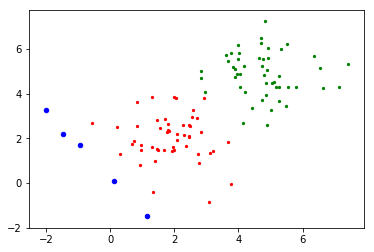

In [29]:
plt.scatter(np.reshape(x_ones, (2, int(N/2)))[0], np.reshape(x_ones, (2, int(N/2)))[1], s = 5, c='r')
plt.scatter(np.reshape(x_zeros, (2, int(N/2)))[0], np.reshape(x_zeros, (2, int(N/2)))[1], s = 5, c='g')
plt.scatter(x1_boundary, x2_boundary, c='b', s=20)
plt.show()